In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np

#import sys
#from os.path import isfile, join
#sys.path.insert(0, join(os.getcwd(),os.pardir))

In [11]:
plt.rc("savefig", dpi=400)

In [12]:
FOLDER_PATH = "F:\\user\\Google Drive\\Catherning Folder\\THU\\Thesis\\Work\\Recipe datasets"
DATASET = ["scirep-cuisines-detail","Yummly28"]
FILES = ["cleaned_data.pkl","full_data.pkl"]

In [13]:
# FROM NN_classification
def createDFrame(file):
    
    dataset = DATASET[1]
    df = pd.read_pickle(os.path.join(
        FOLDER_PATH, dataset, file))
    df = df.set_index("id")
    len1 = len(df)

    dataset = DATASET[0]
    df2 = pd.read_pickle(os.path.join(
        FOLDER_PATH, dataset, file))
    df2["id"] = [len(df)+i for i in range(len(df2))]
    df2 = df2.set_index("id")
    df = pd.concat([df, df2],sort=False)
    if len(df)!=len1+len(df2):
        print("Error! Missing data")

    return df

df_train = createDFrame(FILES[1])

# Data analysis

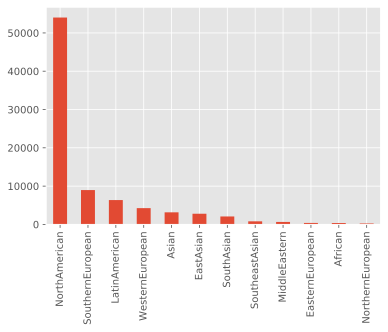

In [35]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

plt.style.use('ggplot')
df_train['cuisine'].value_counts().plot(kind='bar')

df_train['cuisine'].value_counts()
plt.savefig("F:\\user\\Google Drive\\Catherning Folder\\THU\\Thesis\\Work\\Thesis figures\\fuse_dataset.png", bbox_inches='tight')

In [19]:
df_train["nb_ingrs"]=[len(x) for x in df_train["ingredients"]]
df_train["index"] =[i for i in range(len(df_train))]

In [20]:
df_train[["cuisine","nb_ingrs"]].groupby(["cuisine"]).mean().sort_values(by="nb_ingrs")

,nb_ingrs
cuisine,
NorthernEuropean,6.824000
MiddleEastern,8.387597
EasternEuropean,8.388451
NorthAmerican,8.470419
EastAsian,9.415710
WesternEuropean,9.421164
African,10.523416
SouthernEuropean,10.851612
LatinAmerican,11.764771


In [21]:
LIM_INGR = 35
# plot data
nbingr_cuis = df_train[df_train["nb_ingrs"]<LIM_INGR][["cuisine","nb_ingrs","index"]].groupby(["nb_ingrs","cuisine"]).count().unstack()
# DO relative, par rapport nb total dans chaque cuisine

In [22]:
nbingr_cuis.columns=nbingr_cuis.columns.droplevel()

In [23]:
cuisine_count = df_train['cuisine'].value_counts()

In [24]:
for cuis,val in cuisine_count.iteritems():
    nbingr_cuis[cuis]=nbingr_cuis[cuis]/val

In [25]:
cuisine_list = df_train.cuisine.unique()

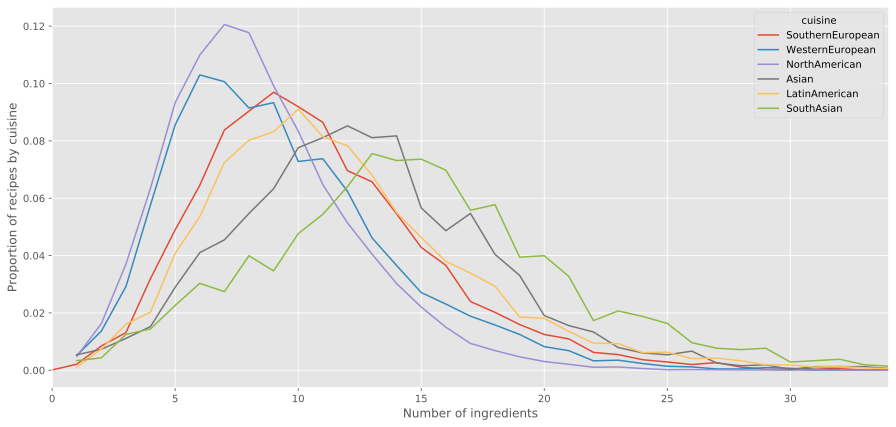

In [28]:
fig, ax = plt.subplots(figsize=(15,7))
nbingr_cuis.plot(y=cuisine_list[:6],ax=ax)
ax.set_xlabel("Number of ingredients")
ax.set_ylabel("Proportion of recipes by cuisine")
plt.savefig("test.png")

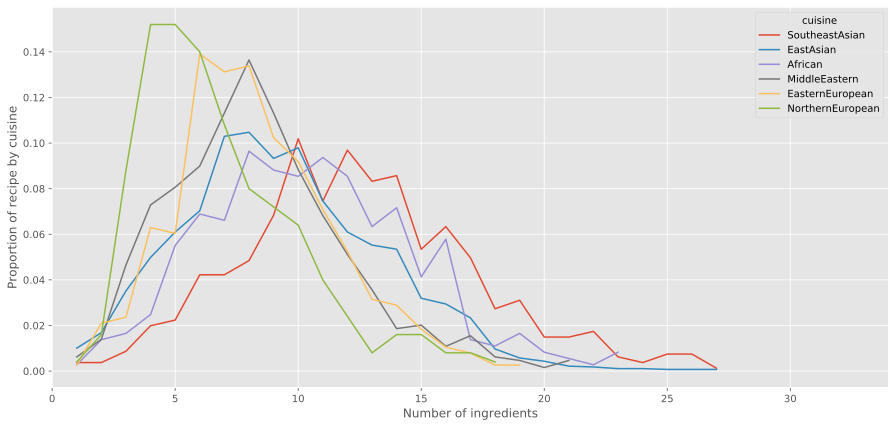

In [30]:
fig, ax = plt.subplots(figsize=(15,7))
nbingr_cuis.plot(y=cuisine_list[6:],ax=ax)
ax.set_xlabel("Number of ingredients")
ax.set_ylabel("Proportion of recipe by cuisine")
plt.savefig("F:\\user\\Google Drive\\Catherning Folder\\THU\\Thesis\\Work\\Thesis figures\\nb_ingr_regions3.png")

### Counter for ingredients

In [37]:
counters = {}
for cuisine in df_train['cuisine'].unique():
    counters[cuisine] = Counter()
    indices = (df_train['cuisine'] == cuisine)
    for ingredients in df_train[indices]['ingredients']:
        counters[cuisine].update(ingredients)

In [38]:
counters['WesternEuropean'].most_common(10)

[('butter', 1620),
 ('egg', 1406),
 ('wheat', 1278),
 ('milk', 912),
 ('olive_oil', 727),
 ('onion', 724),
 ('cream', 659),
 ('black_pepper', 621),
 ('garlic', 546),
 ('salt', 511)]

In [39]:
top10 = pd.DataFrame([[items[0] for items in counters[cuisine].most_common(10)] for cuisine in counters],
            index=[cuisine for cuisine in counters],
            columns=['top{}'.format(i) for i in range(1, 11)])
top10

,top1,top2,top3,top4,top5,top6,top7,top8,top9,top10
SouthernEuropean,olive_oil,garlic,tomato,egg,onion,salt,butter,black_pepper,basil,parmesan_cheese
WesternEuropean,butter,egg,wheat,milk,olive_oil,onion,cream,black_pepper,garlic,salt
NorthAmerican,butter,egg,wheat,onion,milk,garlic,vegetable_oil,vanilla,cream,olive_oil
Asian,soy_sauce,vegetable_oil,sesame_oil,garlic,ginger,salt,rice,sugar,scallion,water
LatinAmerican,garlic,cayenne,onion,tomato,cumin,olive_oil,salt,vegetable_oil,cilantro,corn
SouthAsian,salt,turmeric,garam_masala,vegetable_oil,cumin,garlic,cumin_seed,coriander,cinnamon,cayenne
SoutheastAsian,garlic,vegetable_oil,fish,soy_sauce,cayenne,lime_juice,cilantro,rice,fish_sauce,ginger
EastAsian,soy_sauce,garlic,scallion,sesame_oil,cayenne,rice,ginger,vegetable_oil,black_pepper,soybean
African,olive_oil,onion,cumin,garlic,cayenne,cinnamon,wheat,coriander,bell_pepper,black_pepper
MiddleEastern,wheat,olive_oil,egg,onion,garlic,butter,lemon_juice,black_pepper,parsley,vegetable_oil


In [40]:
df_train['all_ingredients'].str.contains('garlic').value_counts()

False    55136
True     28893
Name: all_ingredients, dtype: int64

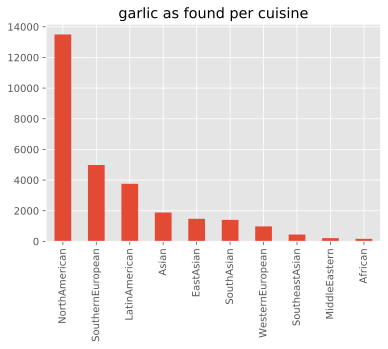

In [41]:
indices = df_train['all_ingredients'].str.contains('garlic')
df_train[indices]['cuisine'].value_counts().head(10).plot(kind='bar',
                                                 title='garlic as found per cuisine')

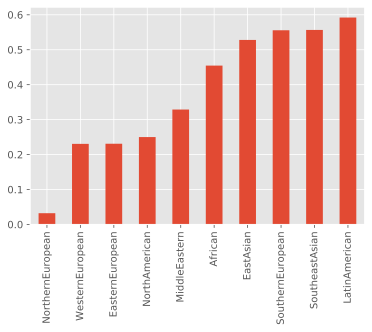

In [42]:
relative_freq = (df_train[indices]['cuisine'].value_counts() / df_train['cuisine'].value_counts())
relative_freq.sort_values(inplace=True)
relative_freq.head(10).plot(kind='bar')

In [43]:
unique = np.unique(top10.values.ravel())
unique.shape

(41,)

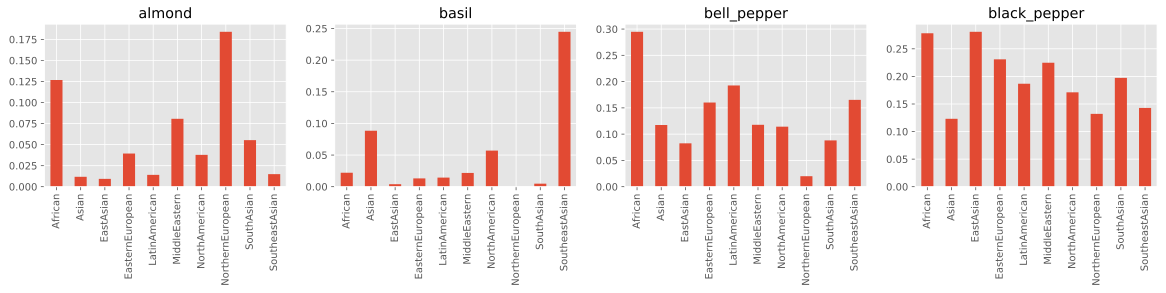

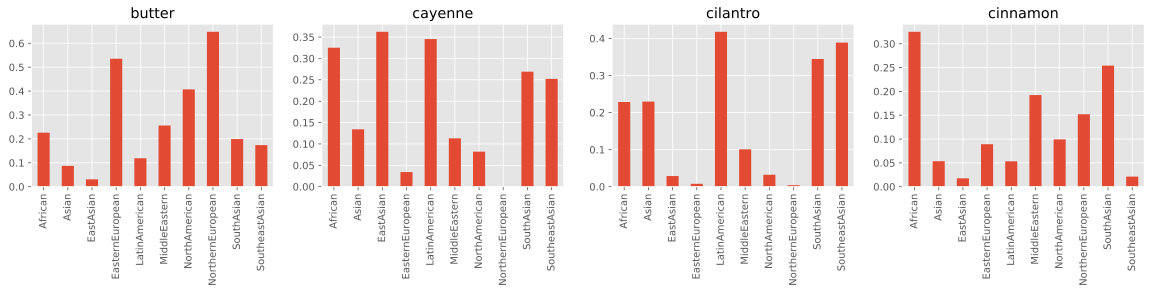

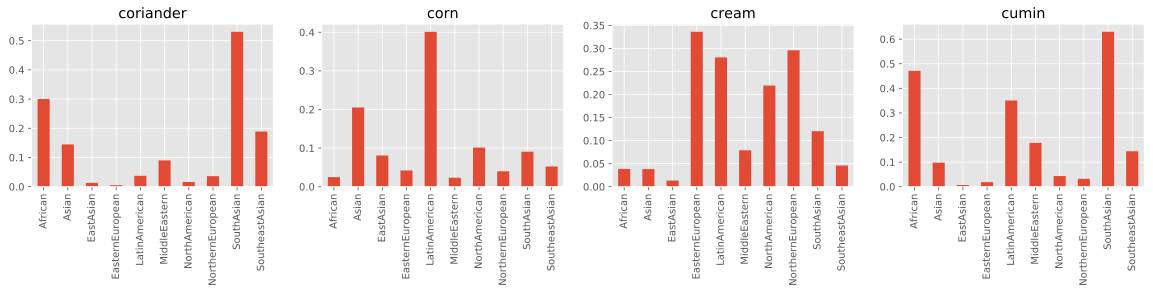

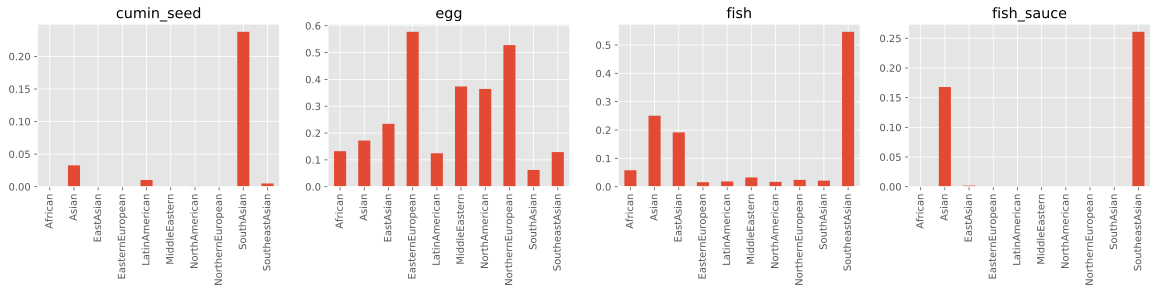

In [49]:
# spot ingredients which have a high degree of uniqueness
square_nb = 4
for nb in range(0,16,4):
    fig, axes = plt.subplots(1, square_nb, figsize=(20, 3))
    for i,(ingredient, ax_index) in enumerate(zip(unique[nb:nb+4], range(square_nb))):
        indices = df_train['all_ingredients'].str.contains(ingredient)
        relative_freq = (df_train[indices]['cuisine'].value_counts() / df_train['cuisine'].value_counts())
        relative_freq.head(10).plot(kind='bar', ax=axes.ravel()[ax_index], title=ingredient)
    plt.savefig("F:\\user\\Google Drive\\Catherning Folder\\THU\\Thesis\\Work\\Thesis figures\\unique{}.png".format((nb+4)//4), bbox_inches='tight')